# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) \, \mathrm{d}x = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 
import scipy
from scipy.optimize import curve_fit

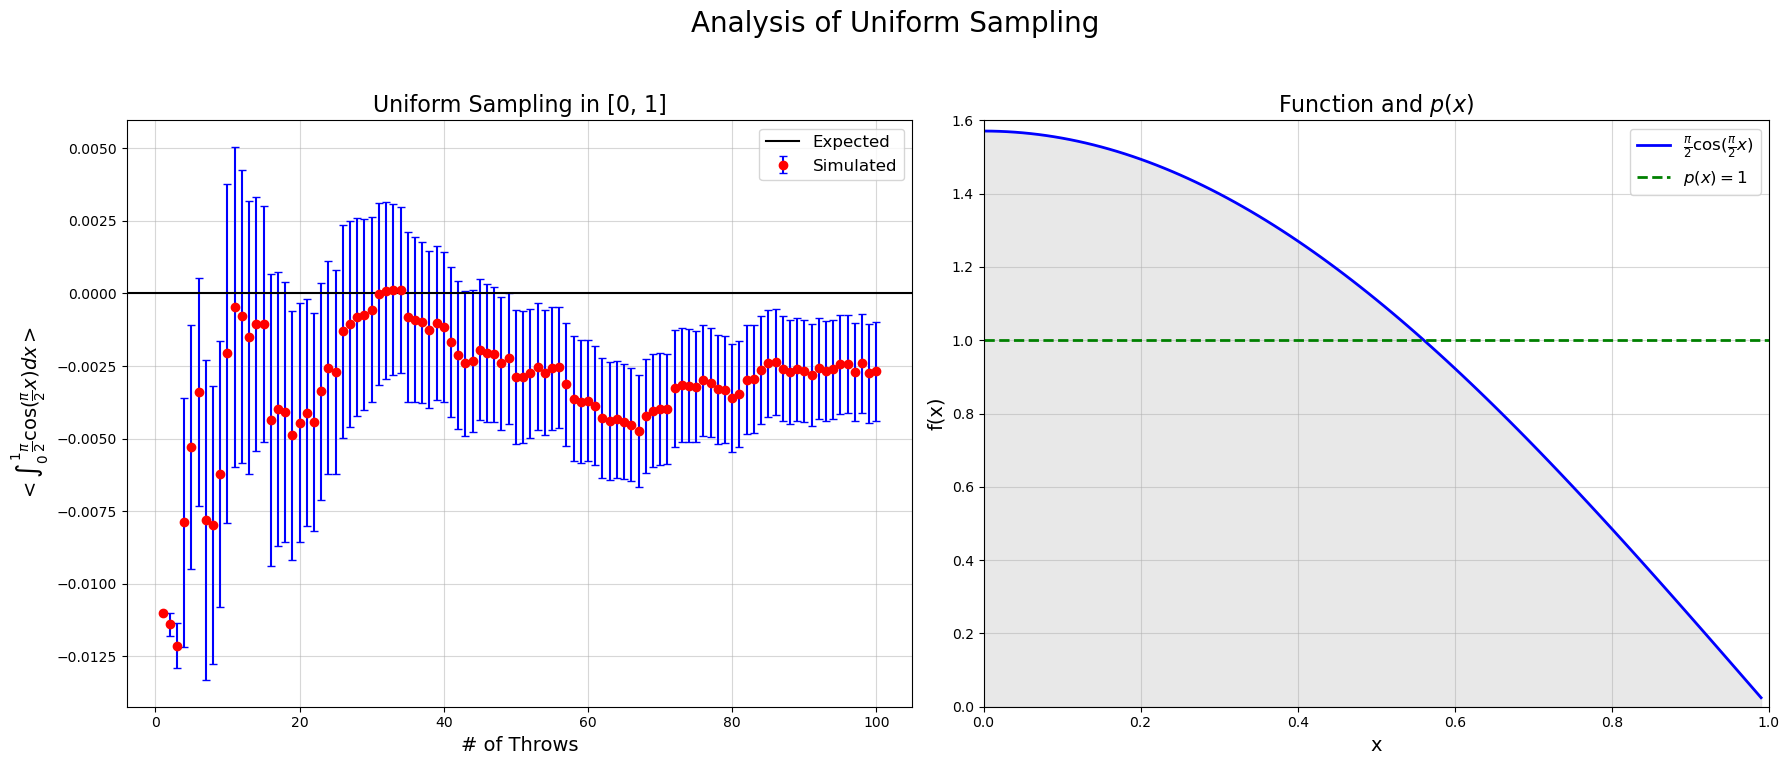

In [2]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from 'uniform.dat' file for the first subplot
x, y, error = np.loadtxt("data/uniform.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# First subplot: error bar plot for simulated data
ax1.errorbar(x, y - 1, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.axhline(y=0, color='black', linestyle='-', label='Expected')  # Expected value line at y=0
ax1.set_xlabel('# of Throws', fontsize=14)
ax1.set_ylabel(r'$<\int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x)dx>$', fontsize=14)
ax1.set_title('Uniform Sampling in [0, 1]', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Generate x values from 0 to 1 with a step of 0.01 for the second subplot
x = np.arange(0, 1, 0.01)

# Second subplot: plot the function and the constant line p(x) = 1
ax2.plot(x, np.pi / 2 * np.cos(np.pi / 2 * x), label=r'$\frac{\pi}{2}\cos(\frac{\pi}{2}x)$', color='blue', linewidth=2)
ax2.axhline(y=1, color='green', linestyle='--', label=r'$p(x)= 1$', linewidth=2)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('f(x)', fontsize=14)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1.6)
ax2.set_title('Function and $p(x)$', fontsize=16)

# Fill the area between the function and the x-axis with light gray color
ax2.fill_between(x, np.pi / 2 * np.cos(np.pi / 2 * x), 0, color='lightgray', alpha=0.5)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Set the main title for the figure
fig.suptitle('Analysis of Uniform Sampling', fontsize=20)

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

As a first Monte Carlo algorithm we can sample x uniformly on (0,1):  
$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{1} \cdot 1  \, \mathrm{d}x = 1$$

the variance connected with this choice is
$$\sigma_I^2 = \langle g^2 \rangle_p - \langle g \rangle^2_p = \int_0^1 \left( \frac{\frac{\pi}{2}\cos(\pi x/2)}{1} \right)^2 \cdot 1 \, \mathrm{d}x - I^2 = \frac{\pi^2}{8}-1 \approx 0.2337$$

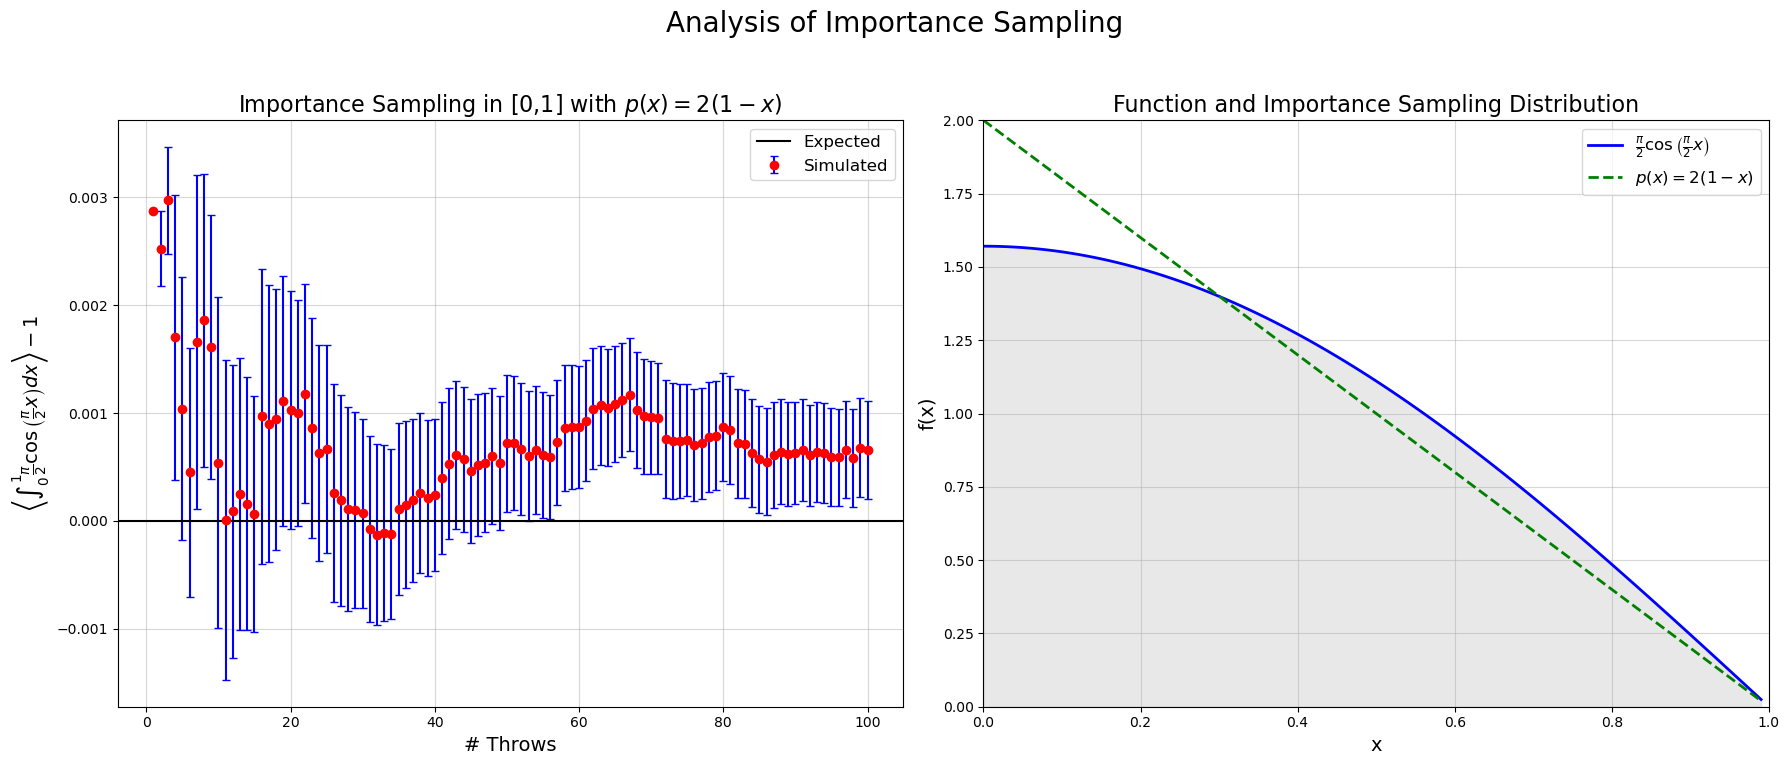

In [3]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from 'importance_sample.dat' file for the first subplot
x, y, error = np.loadtxt("data/importance_sample.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# First subplot: error bar plot for simulated data
ax1.errorbar(x, y - 1, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.axhline(y=0, color='black', linestyle='-', label='Expected')  # Expected value line at y=0
ax1.set_xlabel('# Throws', fontsize=14)
ax1.set_ylabel(r'$\left< \int_0^1 \frac{\pi}{2} \cos\left( \frac{\pi}{2} x \right) dx \right> - 1$', fontsize=14)
ax1.set_title(r'Importance Sampling in [0,1] with $p(x)=2(1-x)$', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Generate x values from 0 to 1 with a step of 0.01 for the second subplot
x = np.arange(0, 1, 0.01)

# Second subplot: plot the function and the importance sampling distribution
ax2.plot(x, np.pi / 2 * np.cos(np.pi / 2 * x), label=r'$\frac{\pi}{2}\cos\left( \frac{\pi}{2} x \right)$', color='blue', linewidth=2)
ax2.plot(x, 2 * (1 - x), color='green', linestyle='--', label=r'$p(x)=2(1-x)$', linewidth=2)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('f(x)', fontsize=14)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 2)
ax2.set_title('Function and Importance Sampling Distribution', fontsize=16)

# Fill the area between the function and the x-axis with light gray color
ax2.fill_between(x, 0, np.pi / 2 * np.cos(np.pi / 2 * x), color='lightgray', alpha=0.5)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Set the main title for the figure
fig.suptitle('Analysis of Importance Sampling', fontsize=20)

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

Importance sampling: using p(x) =   $2 \cdot (1-x)$
$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{2\cdot(1-x)} \cdot 2\cdot(1-x)  \, \mathrm{d}x = 1$$

the variance connected with this choice is
$$\sigma_I^2 = \langle g^2 \rangle_p - \langle g \rangle^2_p = \int_0^1 \left( \frac{\frac{\pi}{2}\cos(\pi x/2)}{2\cdot(1-x)} \right)^2 \cdot 2 \cdot (1-x) \, \mathrm{d}x - I^2 \approx 1.01674 -1 = 0.01674 $$

one order of magnitude smaller with respect to the previous choice

This time we choose a function more similar to the integrand using accept-reject method to sample it.

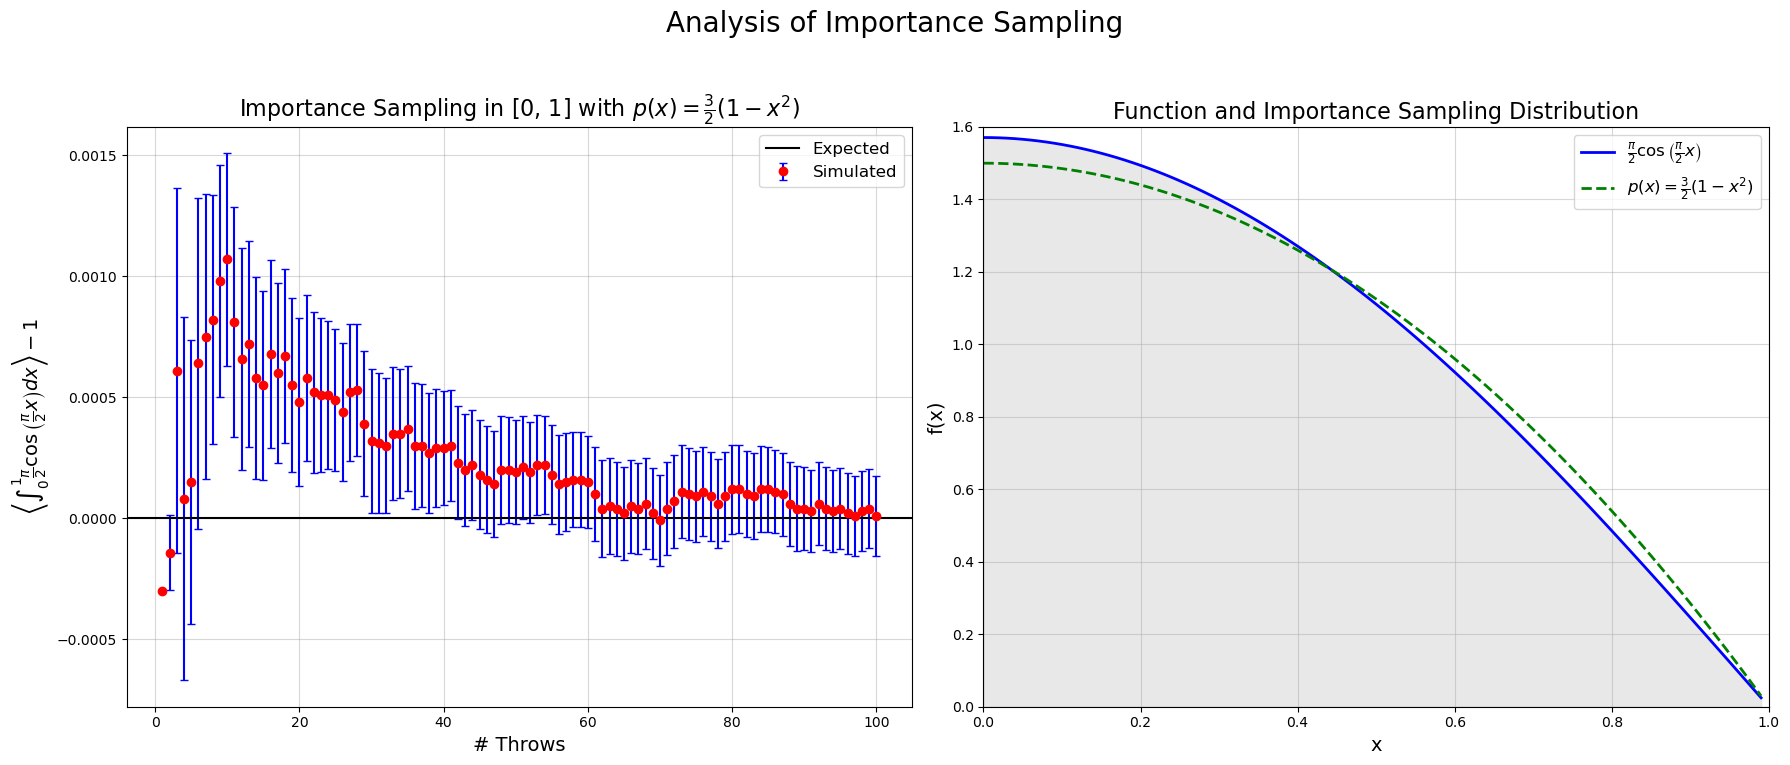

In [4]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from 'importance_sample2.dat' file for the first subplot
x, y, error = np.loadtxt("data/importance_sample2.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# First subplot: error bar plot for simulated data
ax1.errorbar(x, y - 1, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.axhline(y=0, color='black', linestyle='-', label='Expected')  # Expected value line at y=0
ax1.set_xlabel('# Throws', fontsize=14)
ax1.set_ylabel(r'$\left< \int_0^1 \frac{\pi}{2} \cos\left( \frac{\pi}{2} x \right) dx \right> - 1$', fontsize=14)
ax1.set_title(r'Importance Sampling in [0, 1] with $p(x)=\frac{3}{2}(1-x^2)$', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Generate x values from 0 to 1 with a step of 0.01 for the second subplot
x = np.arange(0, 1, 0.01)

# Second subplot: plot the function and the importance sampling distribution
ax2.plot(x, np.pi / 2 * np.cos(np.pi / 2 * x), label=r'$\frac{\pi}{2} \cos\left( \frac{\pi}{2} x \right)$', color='blue', linewidth=2)
ax2.plot(x, 3 * (1 - x**2) / 2, color='green', linestyle='--', label=r'$p(x)=\frac{3}{2} (1 - x^2)$', linewidth=2)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('f(x)', fontsize=14)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1.6)
ax2.fill_between(x, 0, np.pi / 2 * np.cos(np.pi / 2 * x), color='lightgray', alpha=0.5)
ax2.set_title('Function and Importance Sampling Distribution', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Set the main title for the figure
fig.suptitle('Analysis of Importance Sampling', fontsize=20)

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

Importance sampling: using p(x) =   $\frac{3}{2} \cdot (1-x^2)$ because it approximate well $\frac{\pi}{2}\cos(\pi x/2)$ in $[0,1]$

$$I = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{\frac{3}{2} \cdot (1-x^2)} \cdot \frac{3}{2} \cdot (1-x^2)  \, \mathrm{d}x = 1$$

the variance connected with this choice is
$$\sigma_I^2 = \langle g^2 \rangle_p - \langle g \rangle^2_p = \int_0^1 \left( \frac{\frac{\pi}{2}\cos(\pi x/2)}{\frac{3}{2} \cdot (1-x^2)} \right)^2 \cdot \frac{3}{2} \cdot (1-x^2) \, \mathrm{d}x - I^2 \approx 1.002444-1 = 0.002444 $$

another order of magnitude down thanks to choosing a function closer to the original one.

In conclusion, as seen in the lecture using a uniform distribution to estimate an integral works fine, but there are cleverer way to do this task with better results.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Optimal parameter (k): 0.9998701704565709
Parameter uncertainty: [0.00013399]


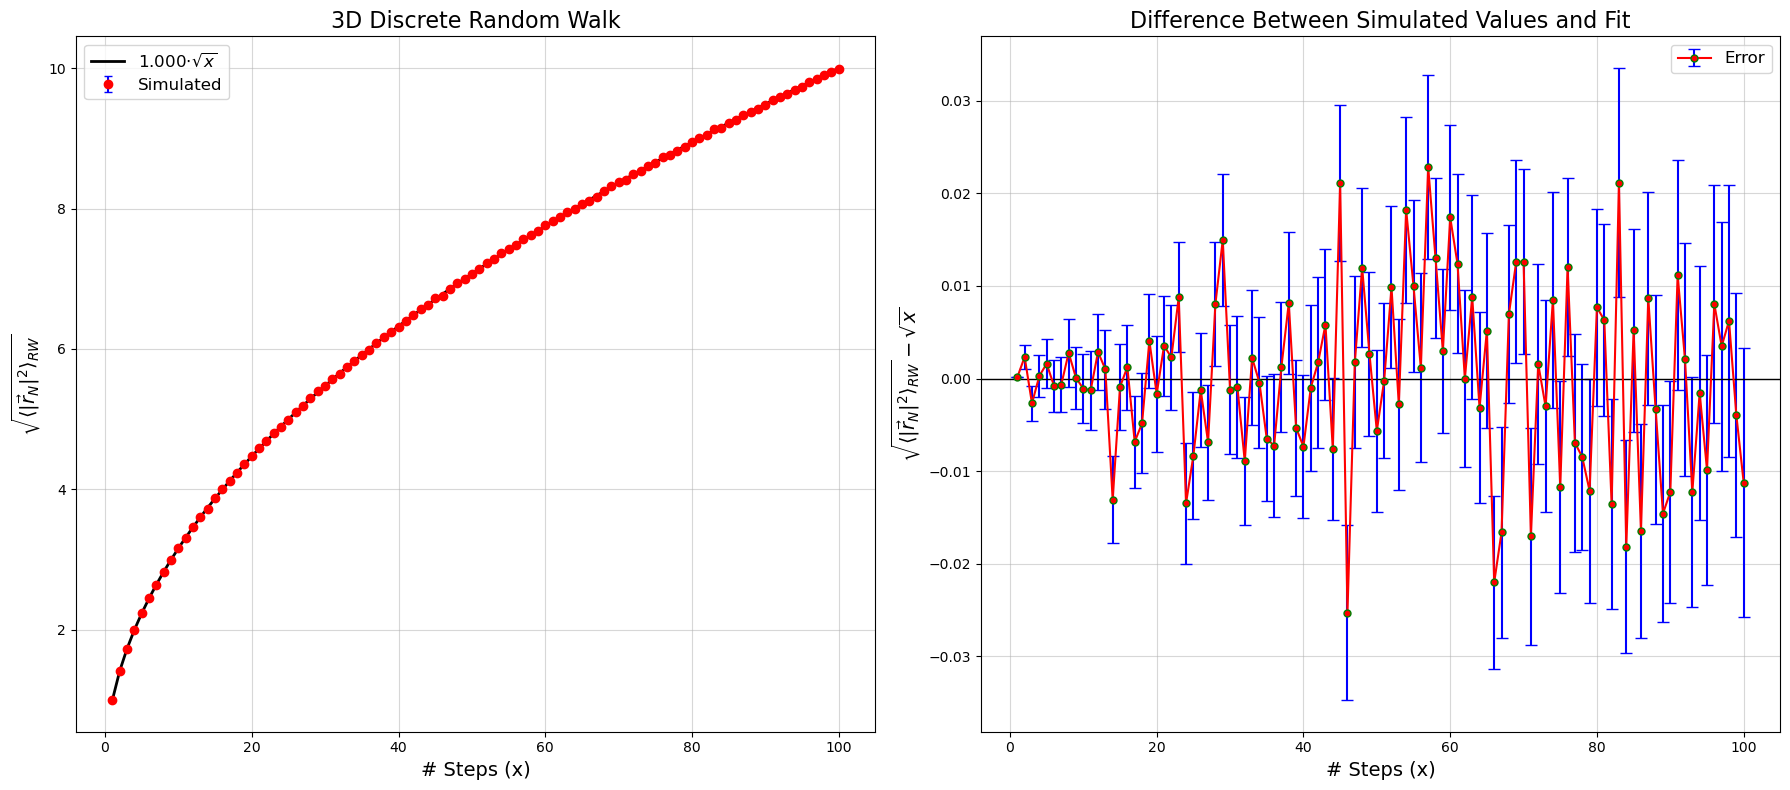

In [5]:
#3D Random Walk Discrete 
# Fitting function: f(x) = k * sqrt(x)
def f(x, k):
    return k * np.sqrt(x)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from '3D_RW_discrete.dat' file
x, y, error = np.loadtxt("data/3D_RW_discrete.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Fit the data using the fitting function
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x, p_opt[0])  # Compute the fitted values

# First subplot: error bar plot for simulated data and the fitted function
ax1.errorbar(x, y, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.plot(x, y_fit, label=f'{p_opt[0]:.3f}' + r'$\cdot \sqrt{x}$', color='black', linewidth=2)
ax1.set_xlabel('# Steps (x)', fontsize=14)
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize=14)
ax1.set_title('3D Discrete Random Walk', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Second subplot: error bar plot for the difference between simulated data and the fitted function
ax2.errorbar(x, y - y_fit, yerr=error, label='Error', color='red', ecolor='blue', fmt='-o', capsize=4, mfc='red', mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('# Steps (x)', fontsize=14)
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - \sqrt{x}$', fontsize=14)
ax2.set_title('Difference Between Simulated Values and Fit', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Print the optimal parameter and its uncertainty
print("Optimal parameter (k):", p_opt[0])
print("Parameter uncertainty:", np.sqrt(np.diag(p_cov)))

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout()
plt.show()

Optimal parameter (k): 1.0000059626652889
Parameter uncertainty: [0.00011135]


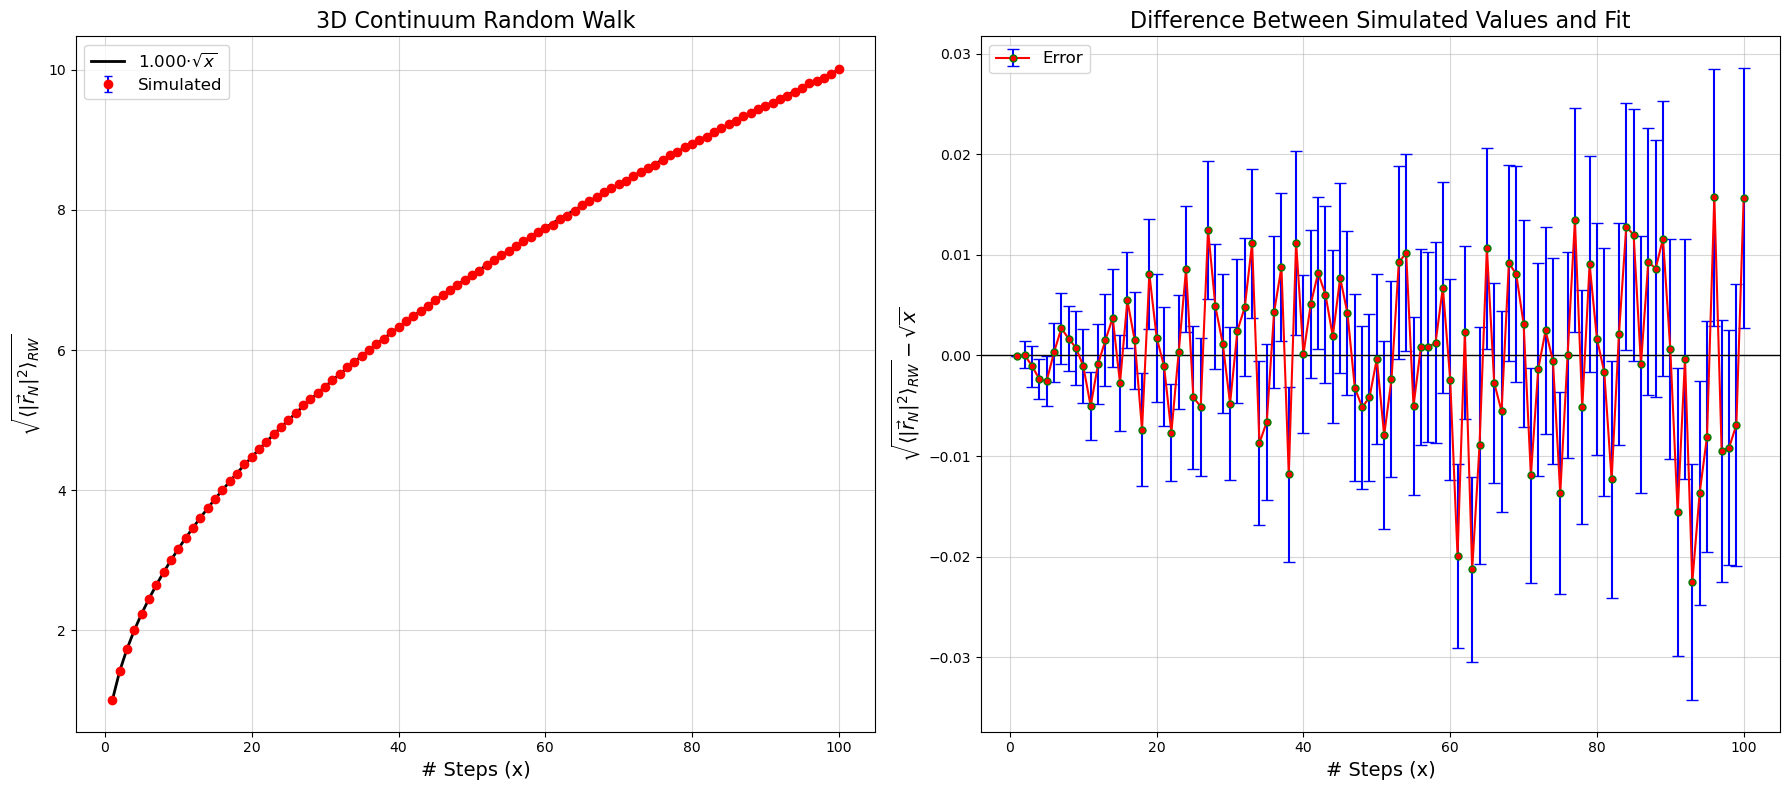

In [6]:
#3D random walk continuum

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from '3D_RW_discrete.dat' file
x, y, error = np.loadtxt("data/3D_RW_continuum.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Fit the data using the fitting function
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x, p_opt[0])  # Compute the fitted values

# First subplot: error bar plot for simulated data and the fitted function
ax1.errorbar(x, y, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.plot(x, y_fit, label=f'{p_opt[0]:.3f}' + r'$\cdot \sqrt{x}$', color='black', linewidth=2)
ax1.set_xlabel('# Steps (x)', fontsize=14)
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize=14)
ax1.set_title('3D Continuum Random Walk', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Second subplot: error bar plot for the difference between simulated data and the fitted function
ax2.errorbar(x, y - y_fit, yerr=error, label='Error', color='red', ecolor='blue', fmt='-o', capsize=4, mfc='red', mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('# Steps (x)', fontsize=14)
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - \sqrt{x}$', fontsize=14)
ax2.set_title('Difference Between Simulated Values and Fit', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Print the optimal parameter and its uncertainty
print("Optimal parameter (k):", p_opt[0])
print("Parameter uncertainty:", np.sqrt(np.diag(p_cov)))

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout()
plt.show()

$$ \sigma_ {S_N} = \sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}= \sqrt{2 D t} = \sqrt{\cancel{2} \frac{1}{\cancel{2} \cancel{\tau}} x \cancel{\tau}}=  \sqrt{x}$$ 
since we do one step $x$ every time tick $\tau = 1$, the time elapsed since the start of the RW is $t= x \tau$ and the lattice spacing is $a = 1$, then according to the Diffusion equation:

$$ D = \frac{a^2}{2\tau} = \frac{1}{2\tau}$$

We find perfect agreement between random walks (discrete and continuum) and diffusive processes.

The previous RW were done re-starting from the origin each time. And we see that $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ are uncorrelated when increasing the number of steps to do.
1Now we repeat the simulation with RW that continues from their previous paths and we observe that for extended time periods the distance from origin is above and below the average. The graph above were more erratic.

Optimal parameter (k): 1.0000470642040282
Parameter uncertainty: [5.30838658e-05]


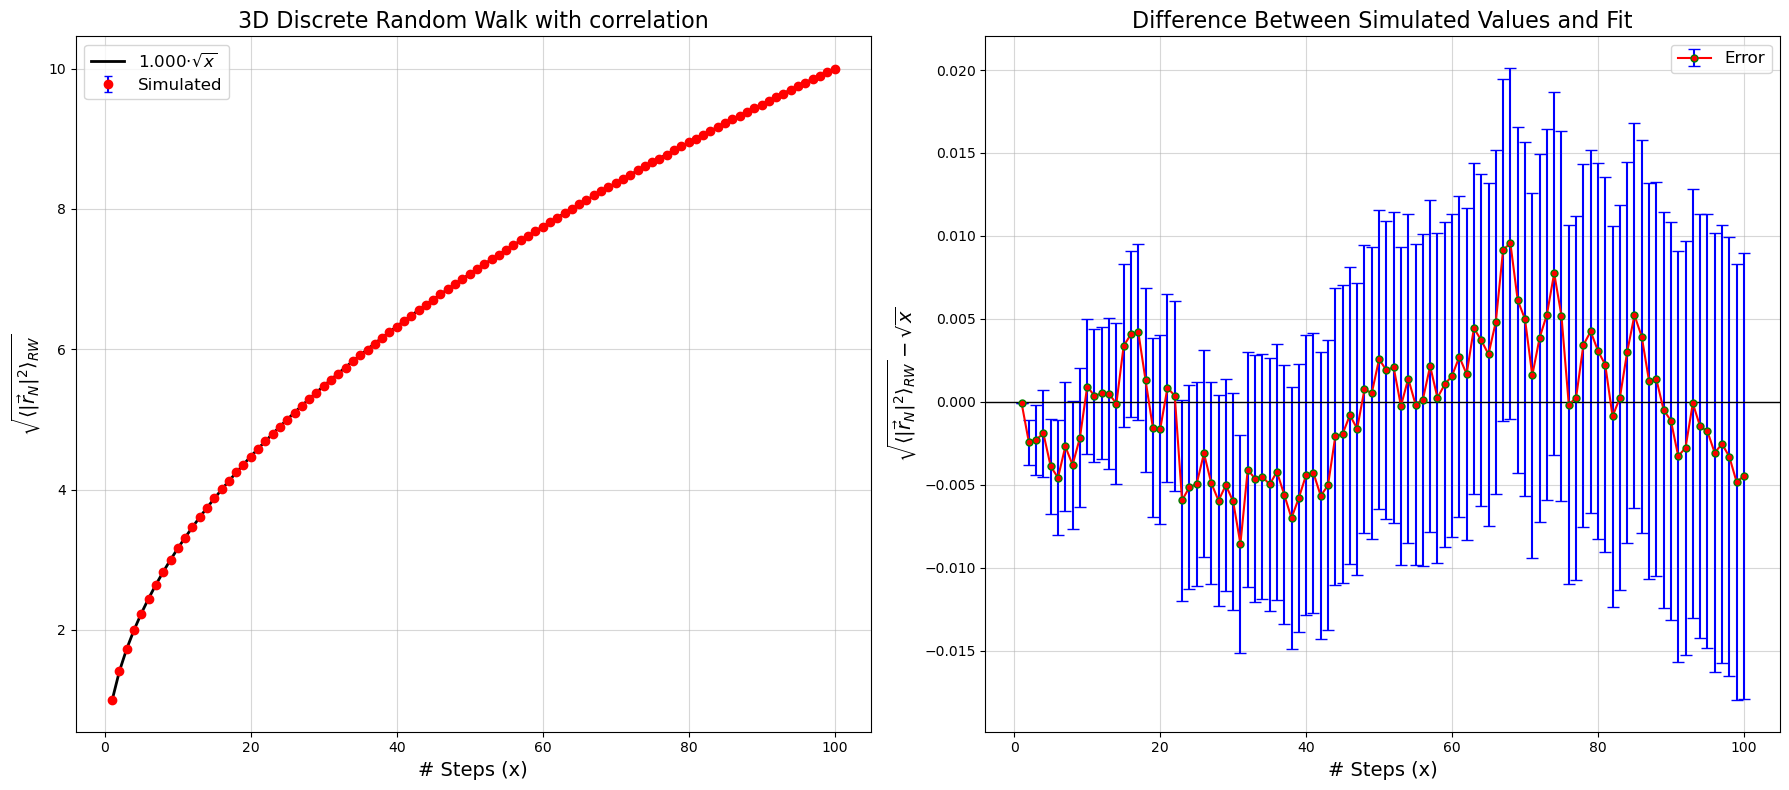

In [7]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from '3D_RW_discrete.dat' file
x, y, error = np.loadtxt("data/3D_RW_discrete_corr.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Fit the data using the fitting function
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x, p_opt[0])  # Compute the fitted values

# First subplot: error bar plot for simulated data and the fitted function
ax1.errorbar(x, y, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.plot(x, y_fit, label=f'{p_opt[0]:.3f}' + r'$\cdot \sqrt{x}$', color='black', linewidth=2)
ax1.set_xlabel('# Steps (x)', fontsize=14)
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize=14)
ax1.set_title('3D Discrete Random Walk with correlation', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Second subplot: error bar plot for the difference between simulated data and the fitted function
ax2.errorbar(x, y - y_fit, yerr=error, label='Error', color='red', ecolor='blue', fmt='-o', capsize=4, mfc='red', mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('# Steps (x)', fontsize=14)
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - \sqrt{x}$', fontsize=14)
ax2.set_title('Difference Between Simulated Values and Fit', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Print the optimal parameter and its uncertainty
print("Optimal parameter (k):", p_opt[0])
print("Parameter uncertainty:", np.sqrt(np.diag(p_cov)))

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout()
plt.show()

Optimal parameter (k): 0.9980668565214089
Parameter uncertainty: [0.00010426]


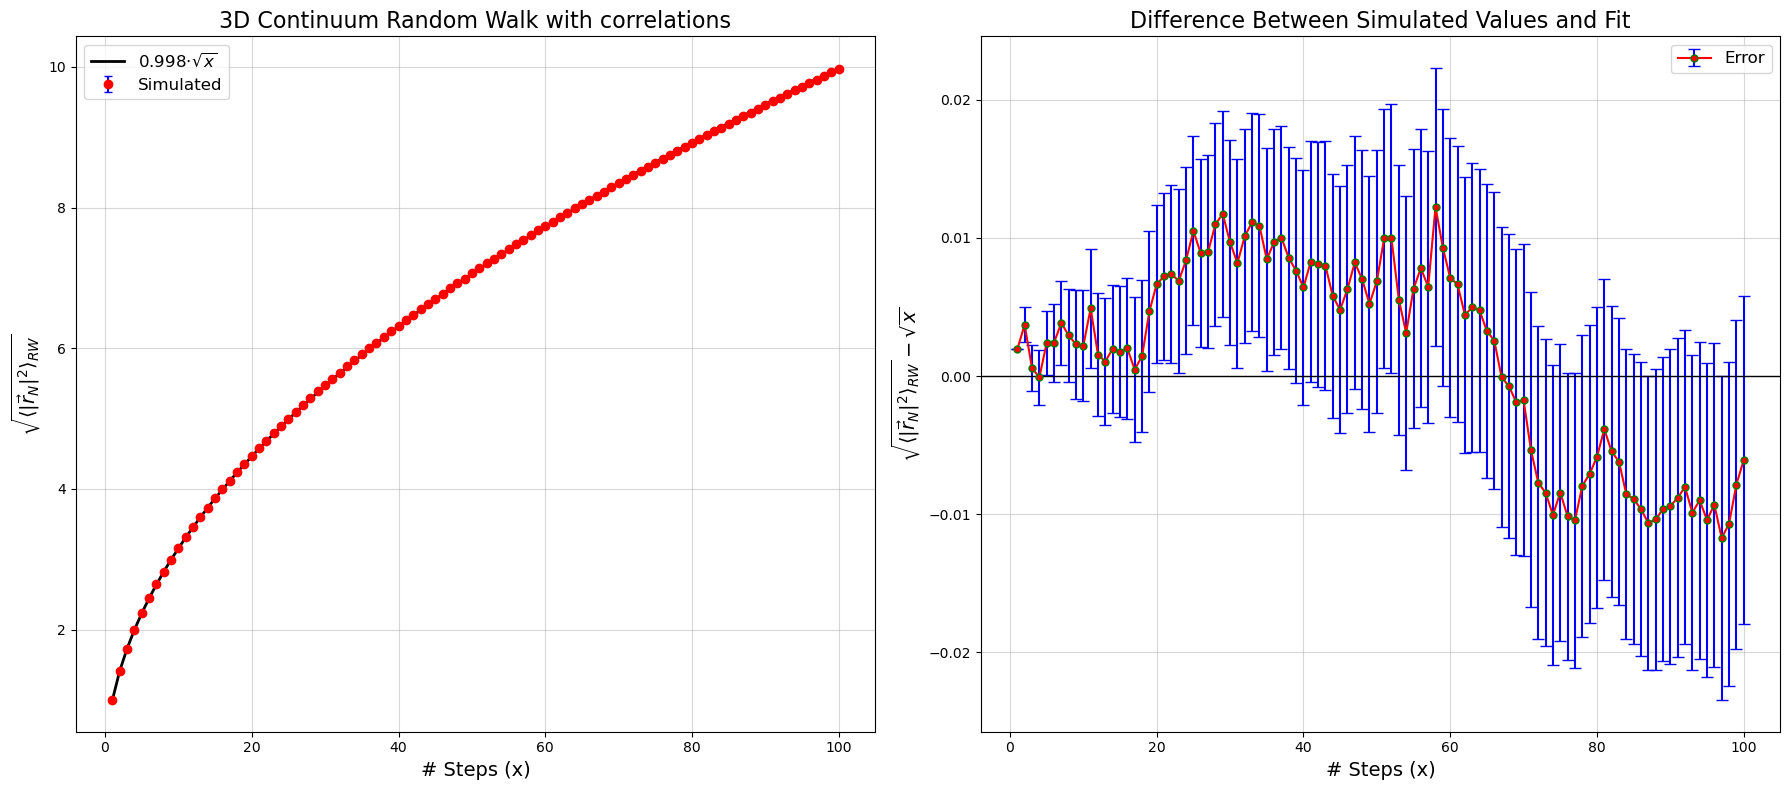

In [8]:
#3D random walk continuum con correlazione

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Load data from '3D_RW_discrete.dat' file
x, y, error = np.loadtxt("data/3D_RW_continuum_corr.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Fit the data using the fitting function
p_opt, p_cov = curve_fit(f, x, y)
y_fit = f(x, p_opt[0])  # Compute the fitted values

# First subplot: error bar plot for simulated data and the fitted function
ax1.errorbar(x, y, yerr=error, label='Simulated', color='red', ecolor='blue', fmt='o', capsize=3)
ax1.plot(x, y_fit, label=f'{p_opt[0]:.3f}' + r'$\cdot \sqrt{x}$', color='black', linewidth=2)
ax1.set_xlabel('# Steps (x)', fontsize=14)
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize=14)
ax1.set_title('3D Continuum Random Walk with correlations', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.5)

# Second subplot: error bar plot for the difference between simulated data and the fitted function
ax2.errorbar(x, y - y_fit, yerr=error, label='Error', color='red', ecolor='blue', fmt='-o', capsize=4, mfc='red', mec='green', ms=5, mew=1)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('# Steps (x)', fontsize=14)
ax2.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - \sqrt{x}$', fontsize=14)
ax2.set_title('Difference Between Simulated Values and Fit', fontsize=16)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.5)

# Print the optimal parameter and its uncertainty
print("Optimal parameter (k):", p_opt[0])
print("Parameter uncertainty:", np.sqrt(np.diag(p_cov)))

# Adjust layout to prevent overlapping and ensure readability
plt.tight_layout()
plt.show()